Project Analysis

In [144]:
import pandas, numpy
import matplotlib.pyplot as plt 
import seaborn as sns

In [145]:
applications = pandas.read_csv("./application_record.csv")
credit_records = pandas.read_csv("./credit_record.csv")

In [146]:
# Let's take a look at each dataset individually 
applications.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [147]:
# Lets' see how the credit record looks like 
# 1 - due less 30 days
# 2 - due 30 - 60 days 
# 3 - due 60 - 90 days
# 4 - due 90 - 150 days 
# 5 - due over 150 days 

credit_records.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


Dataset Preparation and Feature Relabeling

In [148]:
# Relabling Credit Records Dataset

CREDIT_MAPPING = {
    "ID": "client_id",
    "STATUS": "due_status",
    "MONTHS_BALANCE": "balance_month"
}
credit_records.rename(columns=CREDIT_MAPPING, inplace=True)

print(credit_records)

# Relabling Applications Records Dataset
APPLICATION_MAPPING = {
    "ID": "client_id",
    "CODE_GENDER": "gender",
    "FLAG_OWN_CAR": "has_car",
    "FLAG_OWN_REALTY": "has_realty",
    "CNT_CHILDREN": "total_children",
    "AMT_INCOME_TOTAL": "annual_income",
    "NAME_INCOME_TYPE": "income_category",
    "NAME_EDUCATION_TYPE": "education_category",
    "NAME_FAMILY_STATUS": "family_status",
    "NAME_HOUSING_TYPE": "living_place",
    "DAYS_BIRTH": "birthday",
    "FLAG_MOBIL": "has_mobile_phone",
    "FLAG_PHONE": "has_phone",
    "FLAG_WORK_PHONE": "has_work_phone",
    "FLAG_EMAIL": "has_email",
    "CNT_FAM_MEMBERS": "family_size",
    "OCCUPATION_TYPE": "job",
    'DAYS_EMPLOYED': 'days_employed',
}

applications.rename(columns=APPLICATION_MAPPING, inplace=True)

print(applications)

         client_id  balance_month due_status
0          5001711              0          X
1          5001711             -1          0
2          5001711             -2          0
3          5001711             -3          0
4          5001712              0          C
...            ...            ...        ...
1048570    5150487            -25          C
1048571    5150487            -26          C
1048572    5150487            -27          C
1048573    5150487            -28          C
1048574    5150487            -29          C

[1048575 rows x 3 columns]
        client_id gender has_car has_realty  total_children  annual_income  \
0         5008804      M       Y          Y               0       427500.0   
1         5008805      M       Y          Y               0       427500.0   
2         5008806      M       Y          Y               0       112500.0   
3         5008808      F       N          Y               0       270000.0   
4         5008809      F       N          

In [149]:
# Editing Dataset Labels for better understanding and easier usage 
applications.info()
applications.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   client_id           438557 non-null  int64  
 1   gender              438557 non-null  object 
 2   has_car             438557 non-null  object 
 3   has_realty          438557 non-null  object 
 4   total_children      438557 non-null  int64  
 5   annual_income       438557 non-null  float64
 6   income_category     438557 non-null  object 
 7   education_category  438557 non-null  object 
 8   family_status       438557 non-null  object 
 9   living_place        438557 non-null  object 
 10  birthday            438557 non-null  int64  
 11  days_employed       438557 non-null  int64  
 12  has_mobile_phone    438557 non-null  int64  
 13  has_work_phone      438557 non-null  int64  
 14  has_phone           438557 non-null  int64  
 15  has_email           438557 non-nul

client_id                  0
gender                     0
has_car                    0
has_realty                 0
total_children             0
annual_income              0
income_category            0
education_category         0
family_status              0
living_place               0
birthday                   0
days_employed              0
has_mobile_phone           0
has_work_phone             0
has_phone                  0
has_email                  0
job                   134203
family_size                0
dtype: int64

In [150]:
# Let's see how many nan values we have in credit records dataset
credit_records.info() 
credit_records.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   client_id      1048575 non-null  int64 
 1   balance_month  1048575 non-null  int64 
 2   due_status     1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


client_id        0
balance_month    0
due_status       0
dtype: int64

In [151]:
# Let's see how many unique application records we have
applications['client_id'].nunique()

438510

In [152]:
# Let's see how many unique credit record we have
credit_records["client_id"].nunique()

45985

In [153]:
# let's see how many intersections to we have 
applications.merge(credit_records, on="client_id")["client_id"].nunique()

36457

Feature Engineering

In [154]:
# Calculating credit window for each individual customer 

grouped = credit_records.groupby('client_id')
customer_credit = pandas.DataFrame()

customer_credit['open_month'] = grouped['balance_month'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted
customer_credit['end_month'] = grouped['balance_month'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account

customer_credit["credit_window"] = customer_credit["end_month"] - customer_credit["open_month"] + 1
customer_credit.reset_index(inplace=True)

customer_credit = customer_credit[['client_id', 'credit_window']]
customer_credit

,client_id,credit_window
0,5001711,4
1,5001712,19
2,5001713,22
3,5001714,15
4,5001715,60
...,...,...
45980,5150482,18
45981,5150483,18
45982,5150484,13
45983,5150485,2


In [155]:
# Joining with main credit table and finding credit difference
DUE_DATATYPES = {
    "0": 0,
    "1": 0,
    "2": 1,
    "3": 1,
    "4": 1,
    "5": 1,
    "X": 0,
    "C": 0
}

def convert_due_status(status: str):
    """
    Transforms digit due statuses to meaningful names
    everything, that is higher than 1 marks as 'overdue', which indicates, 
    that client had a huge pay out delay and might be not reliable
    """
    if not isinstance(status, str): return 0

    if status.isdigit():
        if int(status) > 1: 
            return 1 
    return 0

# Mapping values according to specified standards

credit_records["due_status"] = credit_records['due_status'].map(lambda item: DUE_DATATYPES[str(item)])

# Overdue metrics per client

overdue_per_client = credit_records[["client_id", "due_status"]].groupby(
by=["client_id"])['due_status'].sum().to_frame('overdue_frequency').reset_index()


# Merging with clients
customer_credit = customer_credit.merge(overdue_per_client, on='client_id', how='inner')


# marking client as bed whether it has overdues or not 
customer_credit["bad_client"] = overdue_per_client["overdue_frequency"].apply(
func=lambda summary: True if summary > 0 else False)




customer_credit = customer_credit[["client_id", "credit_window", "bad_client"]]



def set_datatypes(dataset: pandas.DataFrame):
    """
    Optimizing datatypes for dataset compression
    """
    dataset["client_id"] = dataset["client_id"].astype(numpy.int64)
    dataset["credit_window"] = dataset["credit_window"].astype(numpy.int16)
    return dataset

completed_feature_dataset = set_datatypes(customer_credit)

# After Optimizing our dataset, let's check it's characteristics 

completed_feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   client_id      45985 non-null  int64
 1   credit_window  45985 non-null  int16
 2   bad_client     45985 non-null  bool 
dtypes: bool(1), int16(1), int64(1)
memory usage: 494.1 KB


In [156]:
# Let's investigate majority class to get more information about it 

origin_dataset = completed_feature_dataset.merge(applications, on='client_id')
origin_dataset.drop_duplicates(inplace=True)

In [157]:
feature_dataset = pandas.DataFrame()

In [158]:
# Imputing missing values before encoding

origin_dataset.isna().sum()

client_id                 0
credit_window             0
bad_client                0
gender                    0
has_car                   0
has_realty                0
total_children            0
annual_income             0
income_category           0
education_category        0
family_status             0
living_place              0
birthday                  0
days_employed             0
has_mobile_phone          0
has_work_phone            0
has_phone                 0
has_email                 0
job                   11323
family_size               0
dtype: int64

In [159]:
# Using Mode Imputation for Nominal Categorical Feature 'Job'
MISSING_JOB = "missing_job"
feature_dataset['job'] = origin_dataset['job'].fillna(MISSING_JOB)


In [160]:
# Using Imputation for Education and Family Status categories 

import math 
feature_dataset['bad_client'] = origin_dataset['bad_client']
feature_dataset['credit_window'] = origin_dataset['credit_window']
feature_dataset['annual_income'] = origin_dataset['annual_income']
feature_dataset['total_children'] = origin_dataset['total_children']
feature_dataset['client_id'] = origin_dataset['client_id']

feature_dataset['living_place'] = origin_dataset['living_place'].apply(func=lambda item: item.lower())
feature_dataset['education_category'] = origin_dataset['education_category'].apply(func=lambda item: item.lower()) 
feature_dataset['family_status'] = origin_dataset['family_status'].apply(func=lambda item: item.lower())
feature_dataset['income_category'] = origin_dataset['income_category'].apply(func=lambda item: item.lower())

feature_dataset['employed']  = origin_dataset['days_employed'].apply(func=lambda day: False if day > 0 else True)
feature_dataset['age'] = origin_dataset['birthday'].apply(func=lambda day: math.floor(abs(day) / 365))


In [161]:
# Checking the imputation status 
feature_dataset.isna().sum()

job                   0
bad_client            0
credit_window         0
annual_income         0
total_children        0
client_id             0
living_place          0
education_category    0
family_status         0
income_category       0
employed              0
age                   0
dtype: int64

Feature Encoding

In [162]:
# Encoding Binary Features

def encode_binary_features(feature_set: pandas.DataFrame, binary_dataset: pandas.DataFrame):
    """
    Function encodes binary features to corresponding boolean values 
    Yes - True
    No - False
    
    It is implied to convert binary features to appropriate format, because 
    some models does not do well with categorical variables and requires feature tranformation
    
    Args:
        dataset: input dataset, which contains binary features
    """
    try:
        for feature in binary_dataset.columns:
            feature_set[feature] = binary_dataset[feature].apply(
                func=lambda item: True if item == "Y" else False
            )
    except(pandas.Warning) as exception_warning:
        Logger.debug(
        "Warning occured, while applying function to dataframe features: '%s'" % (exception_warning)
        )
        raise NotImplemented("Failed to encode binary features")
    
def encode_gender_feature(gender_feature: pandas.Series) -> pandas.DataFrame:
    """
    Encodes Gender Feature using One-Hot Encoding
    Args:
        gender_feature - pandas.Series object, which contains 
        about the client's gender
    """
    gender_features = pandas.get_dummies(gender_feature).rename(
    columns={'F': 'Female', 'M': 'Male'})
    return gender_features


binary_features = ["has_car", "has_mobile_phone", 
"has_phone", "has_email", "has_work_phone", "has_realty"]

encode_binary_features(feature_dataset, origin_dataset[binary_features])
gender_features = encode_gender_feature(origin_dataset['gender'])

# combining with encoded gender frame 
feature_dataset = pandas.concat([feature_dataset, gender_features], axis=1)

feature_dataset


,job,bad_client,credit_window,annual_income,total_children,client_id,living_place,education_category,family_status,income_category,employed,age,has_car,has_mobile_phone,has_phone,has_email,has_work_phone,has_realty,Female,Male
0,missing_job,False,16,427500.0,0,5008804,rented apartment,higher education,civil marriage,working,True,32,True,False,False,False,False,True,False,True
1,missing_job,False,15,427500.0,0,5008805,rented apartment,higher education,civil marriage,working,True,32,True,False,False,False,False,True,False,True
2,Security staff,False,30,112500.0,0,5008806,house / apartment,secondary / secondary special,married,working,True,58,True,False,False,False,False,True,False,True
3,Sales staff,False,5,270000.0,0,5008808,house / apartment,secondary / secondary special,single / not married,commercial associate,True,52,False,False,False,False,False,True,True,False
4,Sales staff,False,5,270000.0,0,5008809,house / apartment,secondary / secondary special,single / not married,commercial associate,True,52,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,Core staff,False,18,157500.0,1,5150482,house / apartment,secondary / secondary special,married,working,True,29,True,False,False,False,False,True,True,False
36453,Core staff,False,18,157500.0,1,5150483,house / apartment,secondary / secondary special,married,working,True,29,True,False,False,False,False,True,True,False
36454,Core staff,False,13,157500.0,1,5150484,house / apartment,secondary / secondary special,married,working,True,29,True,False,False,False,False,True,True,False
36455,Core staff,False,2,157500.0,1,5150485,house / apartment,secondary / secondary special,married,working,True,29,True,False,False,False,False,True,True,False


In [163]:
# Analyzing Education Category 

feature_dataset['education_category'].nunique()

5

In [164]:
# There are 5 unique groups in the Education Category Dataset Feature 
# Let's review each of the them 
feature_dataset['education_category'].unique()

array(['higher education', 'secondary / secondary special',
       'incomplete higher', 'lower secondary', 'academic degree'],
      dtype=object)

In [165]:
# Education Data has certain airarphy, in that case, we can consider applying Ordinal Encoder 

from sklearn.preprocessing import OrdinalEncoder 
import typing

def scale_hierarhical_feature(feature_name: str, dataset: pandas.DataFrame, categories: typing.List[str]):
    """
    Function scales feature using Ordinal Encodind
    
    Notes:
        1. Feature should have logical hierarchy, otherwise it would not make sense
        Common example is school grades: 2, 3, 4, 5, which denotes corresponding feedback about work 
        in hierarchical order
        
    Args:
        1. feature_name: name of the feature, that should be encoded
        2. categories: hierarchically ordered list of categories (from top to bottom)
        
    Returns:
        pandas.Series object with ordinal-encoded values
    """
    if feature_name not in dataset.columns: 
        raise AttributeError("Specified Feature is not presented in the dataset")
            
    if dataset[feature_name].isna().sum() > 0: 
        raise ValueError("Series contains null values")
        
    scaler = OrdinalEncoder(categories=[categories]) 
    scaled_data = scaler.fit_transform(dataset[[feature_name]])
    return scaled_data

# Updating Education Category Labels

feature_dataset['education_category'] = feature_dataset['education_category'].map({
    'secondary / secondary special': 'special secondary',
    'incomplete higher': 'incomplete higher education',
    'academic degree': 'academic degree',
    'higher education': 'higher education',
    'lower secondary': 'lower secondary'
})


feature_dataset["education_category"] = scale_hierarhical_feature(
    feature_name="education_category",
    dataset=feature_dataset,
    categories=[
    "academic degree",
    "higher education",
    "incomplete higher education",
    "special secondary",
    "lower secondary",
    ]
)



In [166]:
def encode_family_status(feature_series: pandas.Series):
    if feature_series.isna().sum() > 0: 
        raise TypeError("Feature Series contains null values")
    try:
        return pandas.get_dummies(feature_series)
    except(TypeError, ValueError, AttributeError) as exc:
        Logger.error(exc)
        return numpy.full(shape=(len(feature_series), 1), 
        fill_value="unknown value", dtype=str)
        
if 'family_status' in feature_dataset.columns:
    encoded_family_status = encode_family_status(origin_dataset['family_status'])

    # concatenating tables together 
    feature_dataset = pandas.concat([feature_dataset, 
    encoded_family_status], axis=1)

feature_dataset.head(5)

,job,bad_client,credit_window,annual_income,total_children,client_id,living_place,education_category,family_status,income_category,...,has_email,has_work_phone,has_realty,Female,Male,Civil marriage,Married,Separated,Single / not married,Widow
0,missing_job,False,16,427500.0,0,5008804,rented apartment,1.0,civil marriage,working,...,False,False,True,False,True,True,False,False,False,False
1,missing_job,False,15,427500.0,0,5008805,rented apartment,1.0,civil marriage,working,...,False,False,True,False,True,True,False,False,False,False
2,Security staff,False,30,112500.0,0,5008806,house / apartment,3.0,married,working,...,False,False,True,False,True,False,True,False,False,False
3,Sales staff,False,5,270000.0,0,5008808,house / apartment,3.0,single / not married,commercial associate,...,False,False,True,True,False,False,False,False,True,False
4,Sales staff,False,5,270000.0,0,5008809,house / apartment,3.0,single / not married,commercial associate,...,False,False,True,True,False,False,False,False,True,False


In [167]:
# Analyzing Living Place category
origin_dataset['living_place'].nunique()

6

In [168]:
origin_dataset['living_place'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [169]:
# Encoding Living Place Category

# encoding 'living place' feature

feature_dataset['living_place'] = scale_hierarhical_feature(
    "living_place", 
    origin_dataset,
    [
        "Co-op apartment",
        'Office apartment',
        'Municipal apartment',
        'House / apartment',
        'Rented apartment',
        'With parents'
    ]
)


In [170]:
# showcasing encoded features 
feature_dataset.head(10)

,job,bad_client,credit_window,annual_income,total_children,client_id,living_place,education_category,family_status,income_category,...,has_email,has_work_phone,has_realty,Female,Male,Civil marriage,Married,Separated,Single / not married,Widow
0,missing_job,False,16,427500.0,0,5008804,4.0,1.0,civil marriage,working,...,False,False,True,False,True,True,False,False,False,False
1,missing_job,False,15,427500.0,0,5008805,4.0,1.0,civil marriage,working,...,False,False,True,False,True,True,False,False,False,False
2,Security staff,False,30,112500.0,0,5008806,3.0,3.0,married,working,...,False,False,True,False,True,False,True,False,False,False
3,Sales staff,False,5,270000.0,0,5008808,3.0,3.0,single / not married,commercial associate,...,False,False,True,True,False,False,False,False,True,False
4,Sales staff,False,5,270000.0,0,5008809,3.0,3.0,single / not married,commercial associate,...,False,False,True,True,False,False,False,False,True,False
5,Sales staff,False,27,270000.0,0,5008810,3.0,3.0,single / not married,commercial associate,...,False,False,True,True,False,False,False,False,True,False
6,Sales staff,False,39,270000.0,0,5008811,3.0,3.0,single / not married,commercial associate,...,False,False,True,True,False,False,False,False,True,False
7,missing_job,False,17,283500.0,0,5008812,3.0,1.0,separated,pensioner,...,False,False,True,True,False,False,False,True,False,False
8,missing_job,False,17,283500.0,0,5008813,3.0,1.0,separated,pensioner,...,False,False,True,True,False,False,False,True,False,False
9,missing_job,False,17,283500.0,0,5008814,3.0,1.0,separated,pensioner,...,False,False,True,True,False,False,False,True,False,False


In [171]:
# Analyzing Income category feature 

In [172]:
feature_dataset['income_category'].unique()

array(['working', 'commercial associate', 'pensioner', 'state servant',
       'student'], dtype=object)

In [173]:
feature_dataset['income_category'].nunique() 

5

In [174]:
feature_dataset['income_category'].unique()

array(['working', 'commercial associate', 'pensioner', 'state servant',
       'student'], dtype=object)

In [175]:
# Encoding Job Feature using Binary Encoding

def encode_income_category_feature(feature: pandas.Series):
    """
    Function encodes income category using Binary Encoding Technique 
    Args:
        feature: pandas.Series, containing feature samples
    """
    work_cats = ["Working", "Commercial Associate", "state servant"]
    return feature.apply(
        func=lambda item: True if item in work_cats else False
    )

feature_dataset['job'] = encode_income_category_feature(feature_dataset['job'])


In [176]:
# Let's see how many unique categories we got
feature_dataset['job'].nunique()

1

In [177]:
# Let's take a quick look on these categories 
feature_dataset['job'].unique()

array([False])

In [178]:
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder
import constants

def encode_job_feature(x_y_frame: pandas.DataFrame) -> pandas.DataFrame:
    """
    Encodes Job Feature using K-Fold Target Encoding.
    This choice stands beyond the large number of categories feature has, as well, as 
    this type of target encoding technique is the most benefitial, provides better estimations, 
    avoid data leakage and internal bias 
    
    Args:
        1. feature_set: pandas.Series object, containing values of the feature (aka. feature itself)
        
    Returns:
        pandas.Series object with encoded values
    
    Note:
        1. Feature should not contain any NaN values at the input, exception will be thrown otherwise
    """
    if not 'job' in x_y_frame.columns: raise ValueError("Job Feature is missing")
    if not 'bad_client' in x_y_frame.columns: raise ValueError('Target Feature is missing')
    
    kf = KFold(n_splits=constants.K_FOLD_SPLITS, shuffle=True, random_state=1)
    target_encoder = TargetEncoder(cols=['job'])
    encoded_data = pandas.DataFrame()
    
    for train_idx, val_idx in kf.split(x_y_frame):
        training_data = x_y_frame.iloc[train_idx]
        validation_data = x_y_frame.iloc[val_idx]
        
        target_encoder.fit(training_data['job'], training_data['bad_client'])
        enc_val_data = target_encoder.transform(validation_data['job'])
        encoded_data = pandas.concat([encoded_data, enc_val_data], axis=0)
    
    return encoded_data['job']

# Encoding Job Feature

feature_dataset['job'] = encode_job_feature(feature_dataset[['job', 'bad_client']])
    
feature_dataset
    

,job,bad_client,credit_window,annual_income,total_children,client_id,living_place,education_category,family_status,income_category,...,has_email,has_work_phone,has_realty,Female,Male,Civil marriage,Married,Separated,Single / not married,Widow
0,0.017220,False,16,427500.0,0,5008804,4.0,1.0,civil marriage,working,...,False,False,True,False,True,True,False,False,False,False
1,0.016823,False,15,427500.0,0,5008805,4.0,1.0,civil marriage,working,...,False,False,True,False,True,True,False,False,False,False
2,0.017128,False,30,112500.0,0,5008806,3.0,3.0,married,working,...,False,False,True,False,True,False,True,False,False,False
3,0.017189,False,5,270000.0,0,5008808,3.0,3.0,single / not married,commercial associate,...,False,False,True,True,False,False,False,False,True,False
4,0.017098,False,5,270000.0,0,5008809,3.0,3.0,single / not married,commercial associate,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0.017128,False,18,157500.0,1,5150482,3.0,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False
36453,0.016001,False,18,157500.0,1,5150483,3.0,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False
36454,0.016702,False,13,157500.0,1,5150484,3.0,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False
36455,0.017189,False,2,157500.0,1,5150485,3.0,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False


In [179]:
# Reducing Noise and Dropping Redundant Categorical Features

feature_dataset.drop(
    columns=[
        "client_id",
        "Civil marriage",
        "Separated",
        "Widow",
        "Single / not married",
        "family_status",
        "income_category"
    ], inplace=True, axis=1
)

Imbalance Classification Problem

Text(0.5, 0, 'Proportion of good and bad customers. Bad - 1; Good - 0')

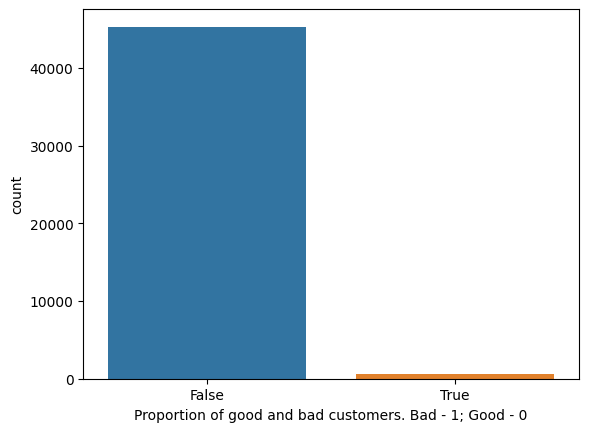

In [180]:
# Let's see how many clients are good (can be potentially considered by the banks) and bad clients

sns.countplot(data=completed_feature_dataset, x="bad_client")
plt.xlabel("Proportion of good and bad customers. Bad - 1; Good - 0")

In [181]:
# Sampling Techniques for dealing with imbalanced datasets
import typing, logging
from imblearn.over_sampling import SMOTE
import pandas 
import constants 

Logger = logging.getLogger(__name__)

def smote_sampling(
    X_train: typing.Union[pandas.DataFrame, pandas.Series], 
    Y_train: typing.Union[pandas.DataFrame, pandas.Series]):

    if not len(X_train) or not len(Y_train): return None, None 
    try:
        smote_tech = SMOTE(random_state=1, k_neighbors=constants.K_SMOTE_NEIGHBORS)
        X_resampled, Y_resampled = smote_tech.fit_resample(X_train, Y_train)
        return X_resampled, Y_resampled
    except(TypeError, ValueError) as train_exception:
        Logger.debug("Failed to balance data using SMOTE Technique, exception raised. [%s]" % train_exception)
        raise train_exception

feature_dataset

,job,bad_client,credit_window,annual_income,total_children,living_place,education_category,employed,age,has_car,has_mobile_phone,has_phone,has_email,has_work_phone,has_realty,Female,Male,Married
0,0.017220,False,16,427500.0,0,4.0,1.0,True,32,True,False,False,False,False,True,False,True,False
1,0.016823,False,15,427500.0,0,4.0,1.0,True,32,True,False,False,False,False,True,False,True,False
2,0.017128,False,30,112500.0,0,3.0,3.0,True,58,True,False,False,False,False,True,False,True,True
3,0.017189,False,5,270000.0,0,3.0,3.0,True,52,False,False,False,False,False,True,True,False,False
4,0.017098,False,5,270000.0,0,3.0,3.0,True,52,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0.017128,False,18,157500.0,1,3.0,3.0,True,29,True,False,False,False,False,True,True,False,True
36453,0.016001,False,18,157500.0,1,3.0,3.0,True,29,True,False,False,False,False,True,True,False,True
36454,0.016702,False,13,157500.0,1,3.0,3.0,True,29,True,False,False,False,False,True,True,False,True
36455,0.017189,False,2,157500.0,1,3.0,3.0,True,29,True,False,False,False,False,True,True,False,True


In [182]:
X_data, Y_data = feature_dataset.drop(columns=['bad_client'], inplace=False), feature_dataset['bad_client']
X_sampled, Y_sampled = smote_sampling(X_data, Y_data)

In [183]:
feature_dataset = pandas.concat([X_sampled, Y_sampled], axis=1)

In [184]:
feature_dataset['bad_client'].value_counts()

bad_client
False    35841
True     35841
Name: count, dtype: int64

Text(0.5, 1.0, 'Dataset after applying SMOTE')

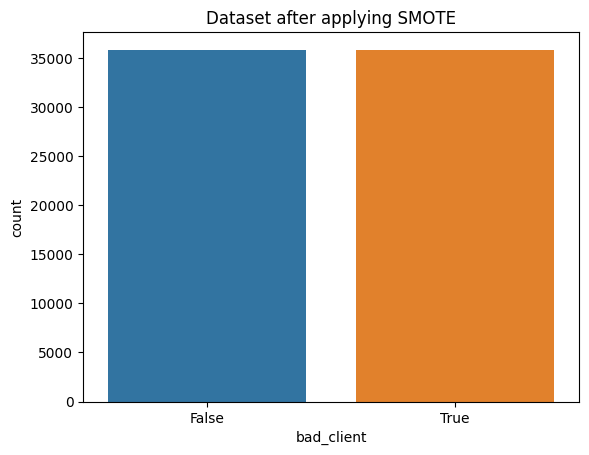

In [185]:
# let's make sure, that class distribution is proportional now 
sns.countplot(feature_dataset, x='bad_client')
plt.title("Dataset after applying SMOTE")


In [186]:
# Selecting features using Univariate Feature Selection via Chi Squared Test
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X_data, Y_data = feature_dataset.drop(columns=['bad_client'], inplace=False), feature_dataset['bad_client']

model = SelectKBest(score_func=chi2, k=constants.NUMBER_OF_IMPORTANT_FEATURES)
model.fit(X_data, Y_data)
model.transform(X_data) 

feature_importances = dict(
    zip(X_data.columns, model.scores_)
)

for feature in X_data.columns:
    if feature_importances[feature] < 1 or str(feature_importances[feature]) == "nan": 
        feature_importances.pop(feature)

sort_importances = sorted(feature_importances, 
key=lambda item: feature_importances[item], reverse=True)

feature_importances = {key: feature_importances[key] for key in sort_importances[:8]}
feature_importances

{'credit_window': 92732.95183819698,
 'annual_income': 23843.544060993718,
 'Male': 2304.8082251351184,
 'total_children': 1524.6881424524483,
 'has_car': 902.5621403208032,
 'Married': 454.8897547854603,
 'Female': 446.322860811117,
 'has_realty': 360.15875066494414}

Text(0.5, 1.0, 'Feature Importances')

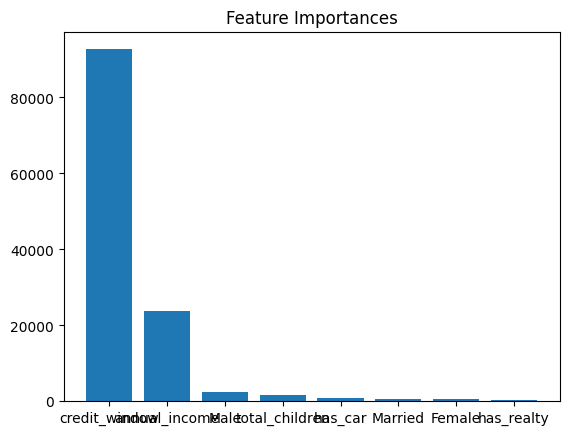

In [187]:
plt.bar(feature_importances.keys(), feature_importances.values())
plt.title("Feature Importances")

In [188]:
feature_dataset = feature_dataset[list(feature_importances.keys()) + ['bad_client']]
feature_dataset

,credit_window,annual_income,Male,total_children,has_car,Married,Female,has_realty,bad_client
0,16,427500.0,True,0,True,False,False,True,False
1,15,427500.0,True,0,True,False,False,True,False
2,30,112500.0,True,0,True,True,False,True,False
3,5,270000.0,False,0,False,False,True,True,False
4,5,270000.0,False,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
71677,17,90000.0,False,0,False,False,True,False,True
71678,52,135000.0,False,0,False,False,True,True,True
71679,56,180000.0,False,0,False,True,True,True,True
71680,39,90000.0,False,0,True,True,True,True,True


Feature Standardization

In [189]:
# before training models, we need to make sure, that numeric data falls in the same scales 
# otherwise some machine learning algorithms might end up having poor prediction ability 

from sklearn.preprocessing import StandardScaler 

numeric_features = feature_dataset.select_dtypes(include='number').columns
other_features = feature_dataset.select_dtypes(exclude='number').columns

def scale_numeric_features(feature_dataset: pandas.DataFrame):
    """
    Function scales numeric features using Standard Scaler 
    std = 1, mean = 0
    """
    scaler = StandardScaler()
    df = pandas.DataFrame(
    scaler.fit_transform(feature_dataset), 
    columns=feature_dataset.columns
    )
    return df

numeric_dataset = scale_numeric_features(
    feature_dataset=feature_dataset[numeric_features]
)

feature_dataset = pandas.concat([
    feature_dataset[other_features],
    numeric_dataset
], axis=1)

feature_dataset

,Male,has_car,Married,Female,has_realty,bad_client,credit_window,annual_income,total_children
0,True,True,False,False,True,False,-0.690845,2.436270,-0.521919
1,True,True,False,False,True,False,-0.753424,2.436270,-0.521919
2,True,True,True,False,True,False,0.185252,-0.747417,-0.521919
3,False,False,False,True,True,False,-1.379207,0.844427,-0.521919
4,False,False,False,True,True,False,-1.379207,0.844427,-0.521919
...,...,...,...,...,...,...,...,...,...
71677,False,False,False,True,False,True,-0.628267,-0.974823,-0.521919
71678,False,False,False,True,True,True,1.561977,-0.520010,-0.521919
71679,False,False,True,True,True,True,1.812291,-0.065198,-0.521919
71680,False,True,True,True,True,True,0.748458,-0.974823,-0.521919


<Axes: >

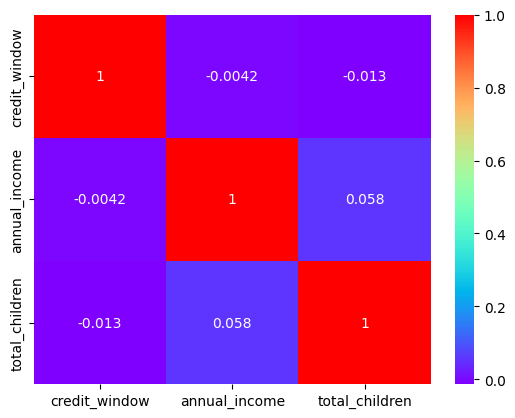

In [190]:
# let's take a look on correlation between these variables
num_features = feature_dataset.select_dtypes(include='number')
sns.heatmap(num_features.corr(), cmap='rainbow', annot = True)


In [191]:
# Splitting data into training, testing and validation sets 
from sklearn.model_selection import train_test_split 

def split_data(feature_dataset):
    
    x_set, y_set = feature_dataset.drop(columns=["bad_client"], inplace=False), feature_dataset['bad_client']

    # Splitting into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(
    x_set, y_set, test_size=0.4, stratify=y_set, random_state=1)

    # Splitting into training and validation sets 
    x_train, validation_x_set, y_train, validation_y_set = train_test_split(
    x_train, y_train, test_size=0.4, stratify=y_train, random_state=1)
    return (x_train, y_train), (x_test, y_test), (validation_x_set, validation_y_set)

training_set, test_set, validation_set = split_data(feature_dataset)

In [239]:
# Selecting models and apply hyperparameter tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, log_loss


models = {
    "knn": KNeighborsClassifier, 
    "decision_tree": DecisionTreeClassifier,
    'random_forest': RandomForestClassifier,
}

models_hyper_information = {

    "knn": {
        'n_neighbors': numpy.arange(1, 21, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
    },

    "decision_tree": {
        'max_depth': numpy.array([2, 3, 5, 10, 20]),
        'min_samples_leaf': numpy.array([5, 10, 20, 50, 100]),
        'criterion': ["gini", "entropy"],
    },
    'random_forest': {
        
        'n_estimators': numpy.array([5, 20, 50, 100]),

        'max_features': ['sqrt'],

        'max_depth': numpy.arange(10, 20, 10),

        'min_samples_split': numpy.array([2, 6, 10]),

        'min_samples_leaf': numpy.array([1, 3, 4]),

        'bootstrap': [True, False],
    }

}

optimal_hyper_parameters = {model: {} for model in models.keys()} 

loss_function = make_scorer(log_loss, greater_is_better=False, needs_proba=True)


def apply_informed_search_cv(
    x_set: pandas.DataFrame, 
    y_set: pandas.Series, 
    model_name: str, 
    hyperparams: typing.Dict,
    error_score,
    folds=10
):
    """
    Function applies HyperParameter Tuning using InformedSearch, based on Bayesian Search
    
    Args:
        1. x_set: pandas.DataFrame object, represents set of independent features,
        2. y_set: pandas.Series object, represents target feature,
        3. model: Machine Learning Model for tuning,
        4. folds: number of splits for cross-validation,
        5. hyperparams: default hyperparams of the model
        6. metric: priority metric for the model
        7. error_score: Scoring Function for error
    """
    
    if not len(x_set) or not len(y_set):
        raise ValueError("X or Y datasets are empty")
        
    new_cvs = GridSearchCV(
        estimator=models[model_name](),
        param_grid=hyperparams,
        scoring=error_score,
        cv=StratifiedKFold(n_splits=folds),
        error_score="raise",
        n_jobs=-1,
    )
    new_cvs.fit(x_set, y_set)
    
    # the lower loss score is, the better model performs 
    
    optimal_hyper_parameters[model_name]["params"] = new_cvs.best_params_
    optimal_hyper_parameters[model_name]["loss_score"] = new_cvs.best_score_
    
    
# Applying Hyperparameter tuning for each model

for model in models.keys():
    try:
        print('training %s...' % (model))
        apply_informed_search_cv(
            x_set=training_set[0],
            y_set=training_set[1],
            model_name=model,
            folds=10,
            hyperparams=models_hyper_information[model],
            error_score=loss_function,
        )
    except(KeyError) as err:
        raise NotImplemented

# Applying Hyperparameter Tuning for each model in the dataset

optimal_models = {
    model_name: models[model_name](**optimal_hyper_parameters[model_name]["params"])
    for model_name in models.keys()
}

optimal_hyper_parameters

training knn...
training decision_tree...
training random_forest...


{'knn': {'params': {'metric': 'manhattan',
   'n_neighbors': 19,
   'weights': 'uniform'},
  'loss_score': -0.42339764104353916},
 'decision_tree': {'params': {'criterion': 'gini',
   'max_depth': 20,
   'min_samples_leaf': 50},
  'loss_score': -0.38160939882342126},
 'random_forest': {'params': {'bootstrap': False,
   'max_depth': 10,
   'max_features': 'sqrt',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100},
  'loss_score': -0.33198764680368625}}

In [209]:
# let's explore each model on different decision thresholds 

from sklearn.metrics import precision_recall_curve, auc


def evaluate_precision_recall_tradeoff(model, X_data, Y_data):
    """
    Functions evaluates tradeoff between precision and recall, 
    based on model's performance
    
    Args:
        model: Machine Learing Classifier for evaluation 
        X_data: feature set of dependent features
        Y_data: independent feature
        
    Returns:
        precision: precision scores of the model
        recall: - recall scores of the model
        auc_scr: auc scores
        thresholds: decision thresholds used for each individual training
    """
    x_tr, x_t, y_tr, y_t = train_test_split(X_data, Y_data, test_size=0.5, random_state=1)
    
    model.fit(x_tr, y_tr)
    y_pred_proba = model.predict_proba(x_t)[:, 1] # positive class prediction proba
    precision, recall, thresholds = precision_recall_curve(y_t, y_pred_proba)
    auc_scr = auc(recall, precision)
    return precision, recall, auc_scr, thresholds

def get_auc_score(y_test, y_pred):
    return auc(y_test, y_pred)

def visualize_pr_tradeoff(precision, recall, auc_score):
    """
    Visualizes Precision-Recall Tradeoff using plot
    """
    plt.plot(recall, precision, label='Precision-Recall Curve (AUC = %0.2f)' % auc_score)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()


In [210]:
# also, let's add functionality for interpolating threshold using scipy library

from scipy.interpolate import interp1d

def interpolate_threshold(desired_precision: int, actual_precision, actual_recall) -> float:
    """
    Function performs linear interpolation using scipy library 
    for predicting decision threshold value
    
    Args:
        desired_precision: int - percentage of desired precision 
        actual_precision: array of precision values 
        actual_recall: array of recall values
        
    Returns:
        estimated threshold float value
    """
    inter_function = interp1d(actual_precision, actual_recall)
    est_threshold = inter_function(desired_precision)
    return est_threshold


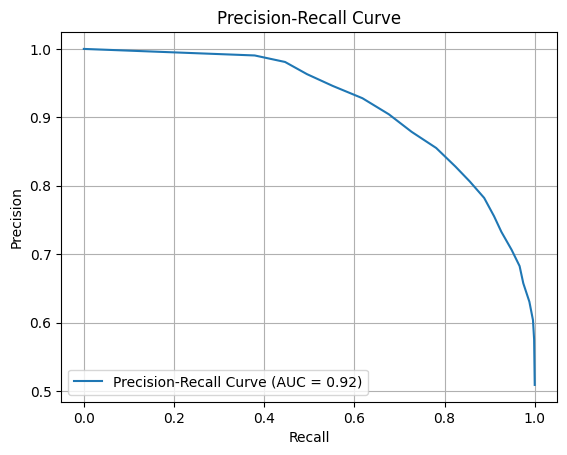

In [252]:
# evaluating thresholds for KNN 

model = optimal_models["knn"]

precision, recall, auc_score, thresholds = evaluate_precision_recall_tradeoff(
    model, validation_set[0], validation_set[1]
)
        
visualize_pr_tradeoff(precision, recall, auc_score)

In [253]:
# predicting desired precision for our model 
desired_precision = 0.65
knn_threshold = interpolate_threshold(desired_precision, precision, recall)

print(knn_threshold)

0.9783825085241585


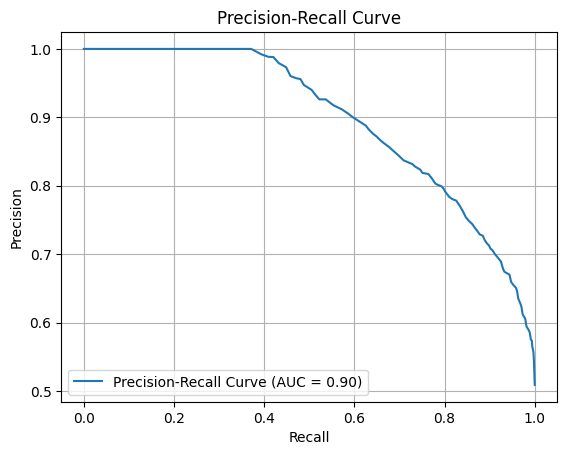

In [242]:
# let's visualize Decision Tree 
# evaluating thresholds for KNN 


model = optimal_models["decision_tree"]

precision, recall, auc_score, thresholds = evaluate_precision_recall_tradeoff(
    model, validation_set[0], validation_set[1]
)
        
visualize_pr_tradeoff(precision, recall, auc_score)


In [243]:
# Let's calculate threshold for Decision Tree 

desired_precision = 0.6
dt_threshold = interpolate_threshold(desired_precision, precision, recall)

print(dt_threshold)

0.9802704352822738


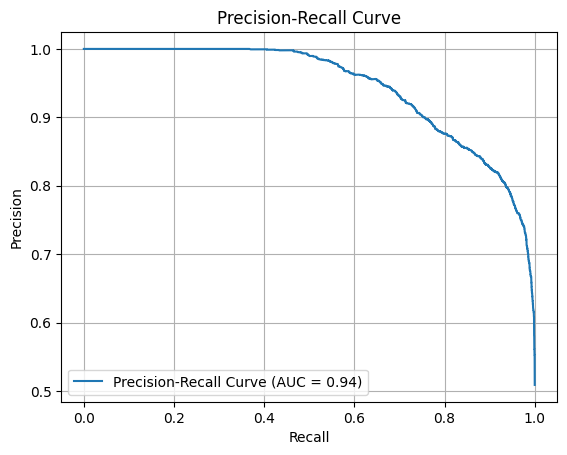

In [244]:
# evaluating thresholds for Random Forest

model = optimal_models["random_forest"]

precision, recall, auc_score, thresholds = evaluate_precision_recall_tradeoff(
    model, validation_set[0], validation_set[1]
)
        
visualize_pr_tradeoff(precision, recall, auc_score)

In [245]:
from sklearn.model_selection import cross_validate 

scorers = ["precision", "recall", "accuracy"]
metrics = {} 

for model in optimal_models.keys():
    scores = cross_validate(
        estimator=optimal_models[model],
        X=validation_set[0],
        y=validation_set[1],
        scoring=scorers
    )
    metrics[model] = {
        "precision_score": numpy.mean(scores['test_precision']),
        "recall_score": numpy.mean(scores['test_recall']),
        "accuracy": numpy.mean(scores["test_accuracy"])
    }

metrics

{'knn': {'precision_score': 0.8058856061770301,
  'recall_score': 0.8875844898179803,
  'accuracy': 0.8368407135567676},
 'decision_tree': {'precision_score': 0.8005833276030193,
  'recall_score': 0.8070199181114279,
  'accuracy': 0.8029528328027954},
 'random_forest': {'precision_score': 0.8441852697687908,
  'recall_score': 0.8621265354107266,
  'accuracy': 0.8514299689787311}}

In [255]:
# let's apply cross-validation and see how it performs on data

from sklearn.model_selection import cross_validate 
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score
)

X_data, Y_data = validation_set[0], validation_set[1]

def cross_validate_with_threshold(cv, model_name, X_train, Y_train):

    model = optimal_models[model_name]
    precision_scores, recall_scores, accuracy_scores = [], [], []

    for train_index, test_index in cv.split(test_set[0], test_set[1]):

        X_train, X_test = test_set[0].iloc[train_index], test_set[0].iloc[test_index]
        Y_train, Y_test = test_set[1].iloc[train_index], test_set[1].iloc[test_index]
        
        # fitting model 
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        
        probs = numpy.array(model.predict_proba(X_test))[:, 1] # positive class prediction 

        # Applying threshold
        y_transformed = (probs >= dt_threshold).astype(int)

        precision = precision_score(Y_test, y_transformed, average='binary', zero_division=1)
        recall = recall_score(Y_test, y_transformed, average='binary', zero_division=1)
        accuracy = accuracy_score(Y_test, y_transformed)

        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    prec = sum(precision_scores) / len(precision_scores)
    rec = sum(recall_scores) / len(precision_scores)
    acc = sum(accuracy_scores) / len(accuracy_scores)

    print(model_name)
    print('precision-score', prec)
    print('recall-score', rec)
    print('accuracy-score', acc)


for model_name in optimal_models.keys():
    cross_validate_with_threshold(
        model_name=model_name,
        cv=StratifiedKFold(n_splits=5),
        X_train=X_data,
        Y_train=Y_data,
    )

knn
precision-score 0.9900891166905408
recall-score 0.4843413410623169
accuracy-score 0.7397204639634065
decision_tree
precision-score 0.9979306466051439
recall-score 0.40196661476066564
accuracy-score 0.700554565389337
random_forest
precision-score 1.0
recall-score 0.16712027257704293
accuracy-score 0.5835456715308646


In [258]:
feature_dataset.columns

Index(['Male', 'has_car', 'Married', 'Female', 'has_realty', 'bad_client',
       'credit_window', 'annual_income', 'total_children'],
      dtype='object')

In [257]:
# saving machine learning model using pickle 
import pickle 
model = optimal_models["knn"]
pickle.dump(model, open("classifier.pkl", mode="wb"))